In [1]:
from matplotlib import patches
import matplotlib.pyplot as plt
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

from copy import copy

In [2]:
def draw_segments(item):

    n_x1 = 0
    n_y1 = 0
    for point in item.points:
        if point[0] > n_x1:
            n_x1 = copy(point[0])
        if point[1] > n_y1:
            n_y1 = copy(point[1])
    pallet_width = n_x1
    pallet_height = n_y1

    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, pallet_width + 2)
    ax.set_ylim(-0.5, pallet_height + 2)

    for i in range(len(item.segments)):
        plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

    figure = patches.Polygon(item.points,
                                linewidth=1,
                                edgecolor='red',
                                fill=False)
    ax.add_patch(figure)

    for i in range(len(item.segments)):
        for sigment in item.segments[i]:
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [i*h, i*h], color = 'blue')
            else:
                ax.scatter(sigment[0], i*h, color = 'blue', s = 4)

    plt.show()

[0, 0]
[2.8652295007023554, 0]
[5.781599813476603, 0]
[2.534541409321463, 5]
[4.880642837022222, 4]
[8.03160009007506, 3]
[8.445503114624373, 0]
[0, 6]
[7.021442837022223, 5]
[2.534541409321463, 3]


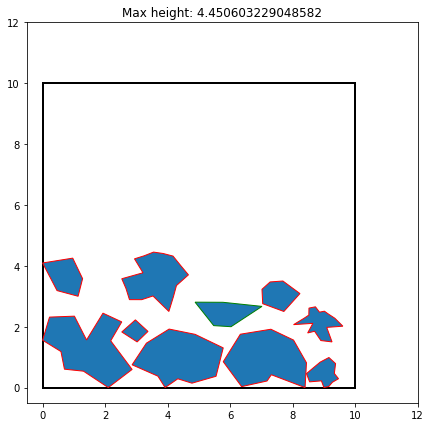

In [3]:
from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

h = 0.5

packing = Packing(width=10, height=10, drill_radius=0)

pallets = Pallets([10, 10])
pallets.grid_step = h
pallets.add_pallet_lines()

# print(pallets.pallet_lines)

# packaging.items = items

packing.create_random_polygons(num_items= 10)

for item in packing.items:
    item.rotation = 1
#     fig, ax = plt.subplots()
#
#     ax.set_xlim(-0.5, 4)
#     ax.set_ylim(-0.5, 4)
#
#
#     figure = patches.Polygon(item.points,
#                                 linewidth=1,
#                                 edgecolor='red',
#                                 fill=False)
#     ax.add_patch(figure)
#     plt.show()



packing.pallets = pallets
packing.h = h
packing.add_segments_for_items()

packing.set_squares()

packing.sort_items(num_sort=2)

# for item in packing.items:
#     draw_segments(item)
packing.segments_bottom_left()
packing.draw_segments_packing()
